---
title: Sanitization Process for Data Privacy
authors:
- Juan Zinser 
tags:
- knowledge-sharing
- data
- privacy
created_at: 2018-01-30
updated_at: 2018-01-30
tldr: This is short description of the content and findings of the post.
---

As good as data can be now a days, it must satisfy several requirements for it to be made public. A natural trade-off arises between privacy and utility of a dataset. On one side, depending on regulations and the data-holder carefulness, data satisfies certain privacy concerns to prevent sensitive information from being revealed. On the other side, for inference and conclusions to be taken from a dataset, data should be available for people whose interest is to analyze it. These analysis rely on data quality, and the more, the better for it's users. Work has been done to make sure data follows the corresponding privacy constraints, by generalization, suppression or sanitization techniques, with the aim of making data less informative (more private). The purpose of this work is to explore new ways of sanitization for databases and to measure their performance.

Motivation
Why is it important to make data public?

Data privacy exists because making data public is important, and it has to be taken care of before making it public. Open-Data is a term that refers to the action of Public or Private Institutions making their Data Public, and usually it helps to improve public policy and public services. An open data culture enhaces collaboration, participation and social innovation European Data Portal and Janssen, Marijin et al.

## Analyse the Supervised Set

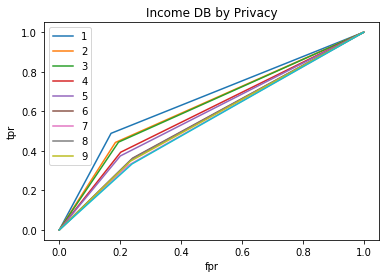

In [12]:
from sanitization_tools import *
supervised_results = pn.read_csv("model_scores_roc.csv")
rocs_by_case(supervised_results, {"real": ["t"], "uniform": 1, "uniform2":1, "model": "tree"},
                {"privacy":[i for i in range(1,11)]}, savefig=False, title="by Privacy")

In [2]:
sup_auc_plot(supervised_results, "privacy", ["t", "m", "f"], [0, 1])
sup_auc_plot(supervised_results,  "privacy", ["t", "m", "f"], [0])
sup_auc_plot(supervised_results, "privacy", ["t", "m", "f"], [1])

sup_auc_plot(supervised_results, "privacy", ["t"], [0, 1])
sup_auc_plot(supervised_results, "privacy", ["m"], [0, 1])
sup_auc_plot(supervised_results,  "privacy", ["f"], [0, 1])

## Analyse the Non-Supervised Set

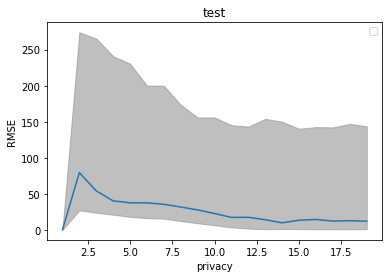

In [3]:
from sanitization_tools import *
non_supervised_results = pn.read_csv("rmse_df_simulated.csv")
plot_params(non_supervised_results, "privacy",{"privacy":20, "real":"t", "uniform":1}, savefig=False, title="test")

In [14]:
non_supervised_results.columns

Index(['Unnamed: 0', 'case', 'rmse', 'privacy', 'real', 'uniform', 'uniform2',
       'nclasses', 'uniform_original'],
      dtype='object')

/home/juanzinser/Workspace/datank-knowledge/knowledge-sharing/sanitization_tools.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data_f[gb_param] = data_f[gb_param].map(int)


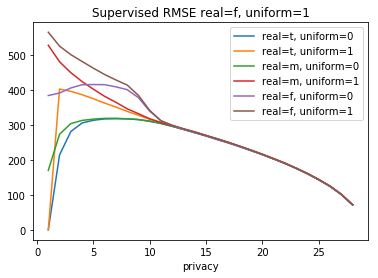

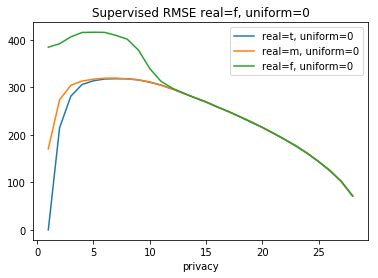

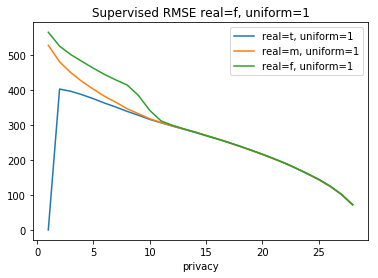

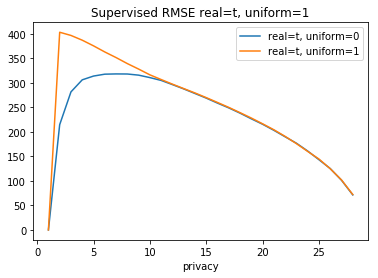

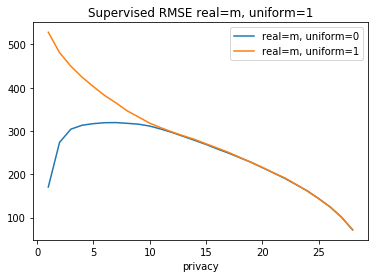

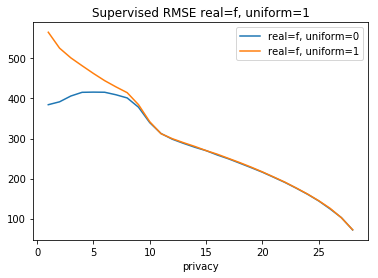

In [2]:
non_supervised_results = pn.read_csv("rmse_df_simulated.csv")
reco_df = non_supervised_results
reco_df["privacy"] = reco_df["case"].map(lambda x: re.findall("\d+", x)[0])
reco_df["real"] = reco_df["case"].map(lambda x: re.findall("[^\d]",x)[0])
reco_df["uniform"] = reco_df["case"].map(lambda x: int(re.findall("[^\d]",x)[1] == "t"))

reco_gb = reco_df.groupby(["privacy", "real", "uniform"])["rmse"].agg(lambda x: math.sqrt(sum(x))).reset_index()

sup_rmse_plot(reco_gb, "privacy", ["t", "m", "f"], [0, 1])
sup_rmse_plot(reco_gb,  "privacy", ["t", "m", "f"], [0])
sup_rmse_plot(reco_gb, "privacy", ["t", "m", "f"], [1])

sup_rmse_plot(reco_gb, "privacy", ["t"], [0, 1])
sup_rmse_plot(reco_gb, "privacy", ["m"], [0, 1])
sup_rmse_plot(reco_gb,  "privacy", ["f"], [0, 1])